In [14]:
import numpy as np
import cv2 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg 
from ipywidgets import interact, interactive
import ipywidgets as widgets

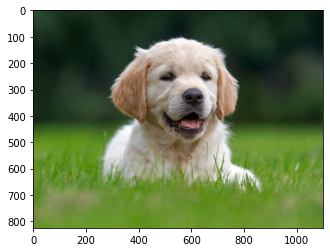

In [3]:
#originale
image = mpimg.imread('images/dog.jpeg')
imgplot = plt.imshow(image)
plt.show()


In [9]:
def segm(k):
    
    image = cv2.imread('images/dog.jpeg')
    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #clt = KMeans(n_clusters = 4)
    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image  = image.reshape((h1, w1, 3))

    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image  = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    plt.imshow(image)
    cv2.imwrite('images/dog4.jpeg', quant)


    cv2.imread('images/dog.jpeg')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
!pip install opencv-python

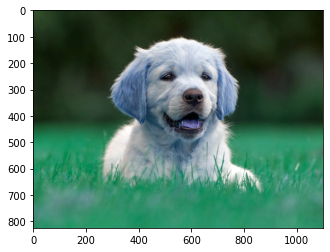

In [10]:
segm(2)

In [12]:
interact(segm, k=widgets.IntSlider(min=2, max=30, step=1, value=2));


interactive(children=(IntSlider(value=2, description='k', max=30, min=2), Output()), _dom_classes=('widget-int…

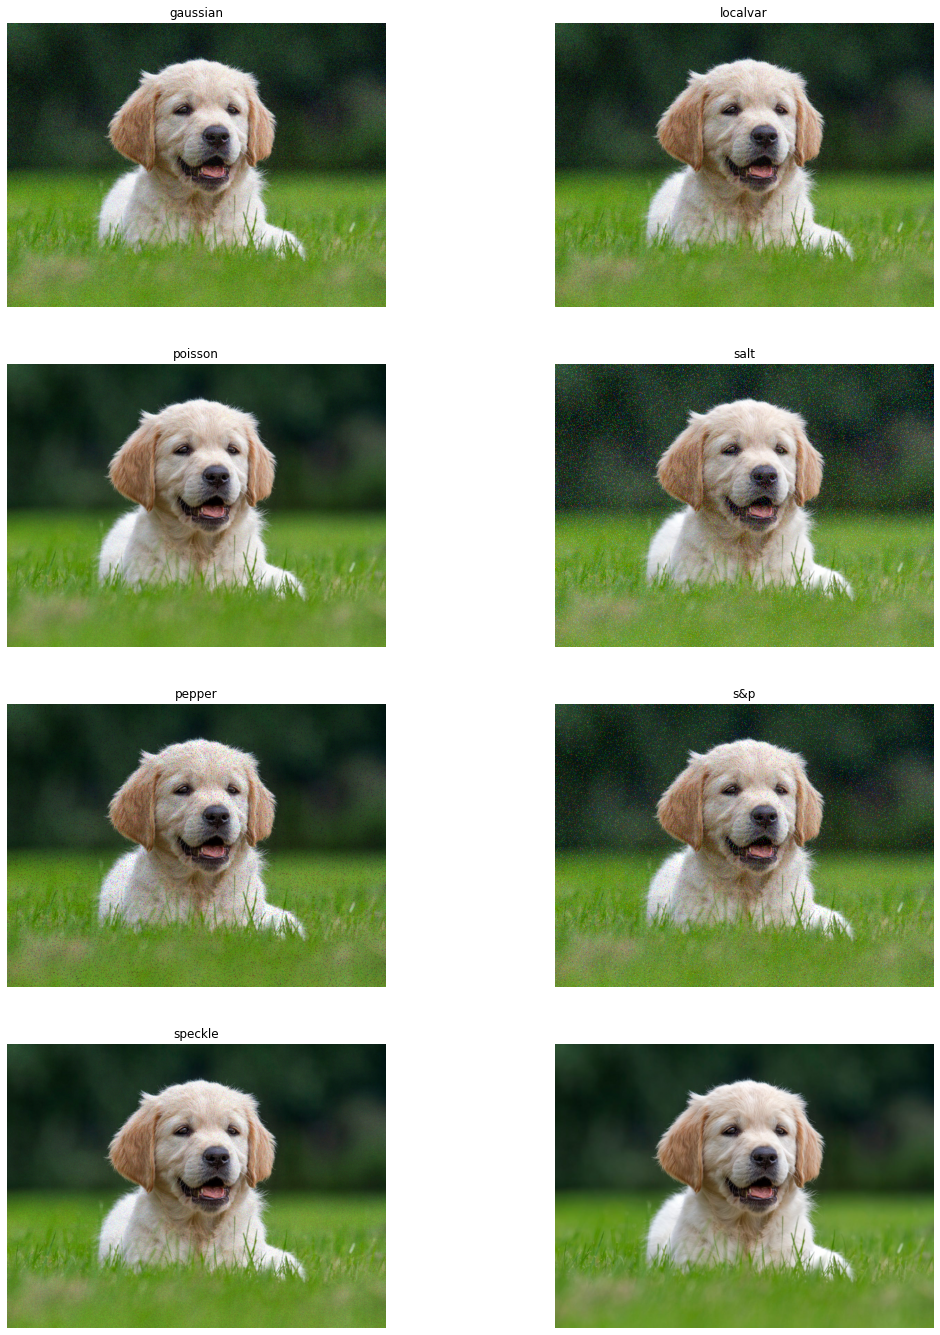

In [18]:
import skimage.io
import matplotlib.pyplot as plt
img_path="images/dog.jpeg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

In [29]:
import skimage.io
import matplotlib.pyplot as plt

img_path="images/dog.jpeg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(mode):
    img_path="images/dog.jpeg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","poisson","salt","pepper","s&p","speckle"]);
"""
plotnoise(img, "gaussian")
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
"""
plt.show()


<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'poisson', 'salt', 'pepper…

In [15]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt

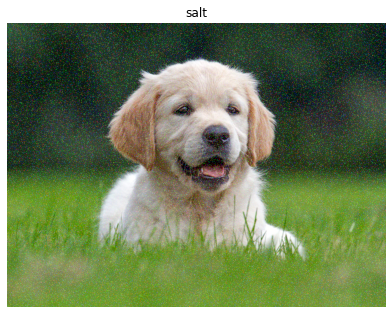

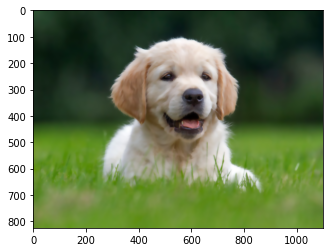

In [16]:
# Apply total variation filter denoising
img_path="images/dog.jpeg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "salt", r,c,4)
plt.show()
denoised_image = denoise_tv_chambolle(img,weight=0.1,multichannel=True)
# Show denoised image
plt.imshow(denoised_image)

In [4]:
!pip install  watermark

In [3]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,numpy,cv2,sklearn.cluster,skimage,matplotlib
# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.3
IPython 7.18.1

pandas 1.1.2
numpy 1.19.1
cv2 4.4.0
sklearn.cluster 0.23.2
skimage 0.17.2
matplotlib 3.3.1

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-52-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
 
last updated: Sat Oct 31 2020 09:41:25 CET


In [8]:
!python --version


Python 3.8.3
